In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, roc_auc_score, average_precision_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, make_scorer
from sklearn.base import clone

In [65]:
data = pd.read_csv('census_bureau_data.csv', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [66]:
columns_df = pd.read_csv('census_bureau_columns.csv', header = None)
columns_df.head()

,0
0,age
1,class of worker
2,detailed industry recode
3,detailed occupation recode
4,education


In [67]:
column_names = columns_df.iloc[:, 0].tolist()
print(column_names)

['age', 'class of worker', 'detailed industry recode', 'detailed occupation recode', 'education', 'wage per hour', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member of a labor union', 'reason for unemployment', 'full or part time employment stat', 'capital gains', 'capital losses', 'dividends from stocks', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household', 'weight', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'num persons worked for employer', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', 'own business or self employed', "fill inc questionnaire for veteran's admin", 'veterans benefits', 'weeks worked 

In [68]:
# Merge raw data with column names
data.columns = column_names
data.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [7]:
print(data.shape)

(199523, 42)


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199523 non-null  int64  
 1   class of worker                             199523 non-null  object 
 2   detailed industry recode                    199523 non-null  int64  
 3   detailed occupation recode                  199523 non-null  int64  
 4   education                                   199523 non-null  object 
 5   wage per hour                               199523 non-null  int64  
 6   enroll in edu inst last wk                  199523 non-null  object 
 7   marital stat                                199523 non-null  object 
 8   major industry code                         199523 non-null  object 
 9   major occupation code                       199523 non-null  object 
 

In [ ]:
# Check for duplicate rows
num_dups = data.duplicated().sum()
print(f"Duplicate rows: {num_dups:,} ({num_dups/len(data):.2%} of the dataset)")
#not dropping without as this is survey data

Duplicate rows: 3,229 (1.62% of the dataset)


In [71]:
na_counts = data.isna().sum()
na_counts[na_counts > 0]

hispanic origin    874
dtype: int64

In [72]:
data["hispanic origin"] = data["hispanic origin"].fillna("Unknown")

In [13]:
# List all numeric columns and their summaries
numeric_cols = data.select_dtypes("number").columns.tolist()
print(f"Numeric columns ({len(numeric_cols)}): {numeric_cols}")

num_summary = data[numeric_cols].describe().T
num_summary

Numeric columns (13): ['age', 'detailed industry recode', 'detailed occupation recode', 'wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', 'weight', 'num persons worked for employer', 'own business or self employed', 'veterans benefits', 'weeks worked in year', 'year']


,count,mean,std,min,25%,50%,75%,max
age,196294.0,34.929468,22.210001,0.00,16.00,34.000,50.00,90.0
detailed industry recode,196294.0,15.603187,18.106401,0.00,0.00,1.000,33.00,51.0
detailed occupation recode,196294.0,11.490468,14.498128,0.00,0.00,2.000,26.00,46.0
wage per hour,196294.0,56.336505,277.054333,0.00,0.00,0.000,0.00,9999.0
capital gains,196294.0,441.870037,4735.677027,0.00,0.00,0.000,0.00,99999.0
capital losses,196294.0,37.927593,274.081174,0.00,0.00,0.000,0.00,4608.0
dividends from stocks,196294.0,200.722386,2000.130616,0.00,0.00,0.000,0.00,99999.0
weight,196294.0,1743.267584,996.945985,37.87,1061.53,1620.175,2194.06,18656.3
num persons worked for employer,196294.0,1.988105,2.371018,0.00,0.00,1.000,4.00,6.0
own business or self employed,196294.0,0.178304,0.557739,0.00,0.00,0.000,0.00,2.0


In [15]:
data.loc[data["wage per hour"] == 9999, "wage per hour"] = np.nan
data.loc[data["capital gains"] == 99999, "capital gains"] = np.nan
data.loc[data["dividends from stocks"] == 99999, "dividends from stocks"] = np.nan

na_counts = data.isna().sum()
na_counts[na_counts > 0]

wage per hour              1
capital gains            390
dividends from stocks     25
dtype: int64

In [73]:
categorical_cols = data.select_dtypes("object").columns.tolist()
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

Categorical columns (29): ['class of worker', 'education', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member of a labor union', 'reason for unemployment', 'full or part time employment stat', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', "fill inc questionnaire for veteran's admin", 'label']


In [74]:
sentinels = {
    "?", "Not in universe", "Not in universe or children",
    "Not in universe under 1 year old", "NaN"
}

rows = []
for col in categorical_cols:
    vc = data[col].astype(str).str.strip().value_counts()
    for s in sentinels.intersection(vc.index):
        rows.append({"column": col, "sentinel_value": s, "count": int(vc[s])})

placeholder_table = (
    pd.DataFrame(rows)
      .sort_values(["column", "count"], ascending=[True, False])
)
placeholder_table

,column,sentinel_value,count
0,class of worker,Not in universe,100245
19,country of birth father,?,6713
20,country of birth mother,?,6119
21,country of birth self,?,3393
1,enroll in edu inst last wk,Not in universe,186943
18,family members under 18,Not in universe,144232
22,fill inc questionnaire for veteran's admin,Not in universe,197539
15,live in this house 1 year ago,Not in universe under 1 year old,101212
2,major industry code,Not in universe or children,100684
3,major occupation code,Not in universe,100684


In [75]:
# 1) true missing / unknown
data = data.replace({"?": "Unknown"})

# 2) structural "not applicable"
not_app = {
    "Not in universe",
    "Not in universe or children",
    "Not in universe under 1 year old",
}
data = data.replace({v: "Not applicable" for v in not_app})

In [79]:
df = data.copy()

df["target"] = df["label"].astype(str).str.strip().map({
    "- 50000.": 0,
    "50000+.": 1
}).astype("int8")

print("Target distribution:\n", df["target"].value_counts())
print("\nTarget proportions:\n", (df["target"].value_counts(normalize=True).round(3) * 100).astype(str) + "%")

Target distribution:
 target
0    187141
1     12382
Name: count, dtype: int64

Target proportions:
 target
0    93.8%
1     6.2%
Name: proportion, dtype: object


In [20]:
df.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label,target
0,73,Unknown,0,0,High school graduate,0.0,Unknown,Widowed,Unknown,Unknown,...,United-States,United-States,Native- Born in the United States,0,Unknown,2,0,95,- 50000.,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0.0,Unknown,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,Native- Born in the United States,0,Unknown,2,52,94,- 50000.,0
2,18,Unknown,0,0,10th grade,0.0,High school,Never married,Unknown,Unknown,...,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Unknown,2,0,95,- 50000.,0
3,9,Unknown,0,0,Children,0.0,Unknown,Never married,Unknown,Unknown,...,United-States,United-States,Native- Born in the United States,0,Unknown,0,0,94,- 50000.,0
4,10,Unknown,0,0,Children,0.0,Unknown,Never married,Unknown,Unknown,...,United-States,United-States,Native- Born in the United States,0,Unknown,0,0,94,- 50000.,0


In [80]:
def add_engineered_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # normalize key string cols used in exact matches
    str_cols = [
        "education", "marital stat", "citizenship", "class of worker",
        "full or part time employment stat",
        "country of birth father", "country of birth mother", "country of birth self"
    ]
    for c in str_cols:
        df[c] = df[c].astype(str).str.strip()

    edu_order = {
        "Children": 0,
        "Less than 1st grade": 1,
        "1st 2nd 3rd or 4th grade": 3,
        "5th or 6th grade": 6,
        "7th and 8th grade": 8,
        "9th grade": 9,
        "10th grade": 10,
        "11th grade": 11,
        "12th grade no diploma": 11,
        "High school graduate": 12,
        "Some college but no degree": 13,
        "Associates degree-occup /vocational": 14,
        "Associates degree-academic program": 14,
        "Bachelors degree(BA AB BS)": 16,
        "Masters degree(MA MS MEng MEd MSW MBA)": 18,
        "Prof school degree (MD DDS DVM LLB JD)": 19,
        "Doctorate degree(PhD EdD)": 20,
    }
    df["education_num"] = df["education"].map(edu_order)
    df["education_num_missing"] = df["education_num"].isna().astype("int8")

    df["age_group"] = pd.cut(
        df["age"], bins=[0, 15, 25, 35, 45, 55, 65, 100],
        labels=["child", "young", "early_career", "mid_career", "senior", "pre_retire", "retired"]
    )

    df["weeks_worked_group"] = pd.cut(
        df["weeks worked in year"], bins=[-1, 0, 13, 26, 39, 48, 52],
        labels=["none", "quarter", "half", "three_quarter", "most", "full_year"]
    )

    df["has_investment_income"] = (
        (df["capital gains"].fillna(0) > 0) | (df["dividends from stocks"].fillna(0) > 0)
    ).astype("int8")

    df["total_investment_income"] = (
        df["capital gains"].fillna(0) + df["dividends from stocks"].fillna(0) - df["capital losses"].fillna(0)
    )

    df["log_capital_gains"] = np.log1p(df["capital gains"].fillna(0))
    df["log_dividends"] = np.log1p(df["dividends from stocks"].fillna(0))
    df["log_wage_per_hour"] = np.log1p(df["wage per hour"].fillna(0))
    df["annual_earnings_proxy"] = df["wage per hour"].fillna(0) * df["weeks worked in year"].fillna(0)

    df["is_married"] = df["marital stat"].isin([
        "Married-civilian spouse present", "Married-A F spouse present"
    ]).astype("int8")

    df["is_citizen"] = df["citizenship"].isin([
        "Native- Born in the United States",
        "Native- Born in Puerto Rico or U S Outlying",
        "Native- Born abroad of American Parent(s)",
        "Foreign born- U S citizen by naturalization"
    ]).astype("int8")

    df["is_self_employed"] = df["class of worker"].isin([
        "Self-employed-not incorporated", "Self-employed-incorporated"
    ]).astype("int8")

    df["is_fulltime"] = (df["full or part time employment stat"] == "Full-time schedules").astype("int8")

    df["parents_both_us"] = (
        (df["country of birth father"] == "United-States") &
        (df["country of birth mother"] == "United-States")
    ).astype("int8")

    df["born_us"] = (df["country of birth self"] == "United-States").astype("int8")

    return df

df = add_engineered_features(df)

In [82]:
df.shape

(199523, 59)

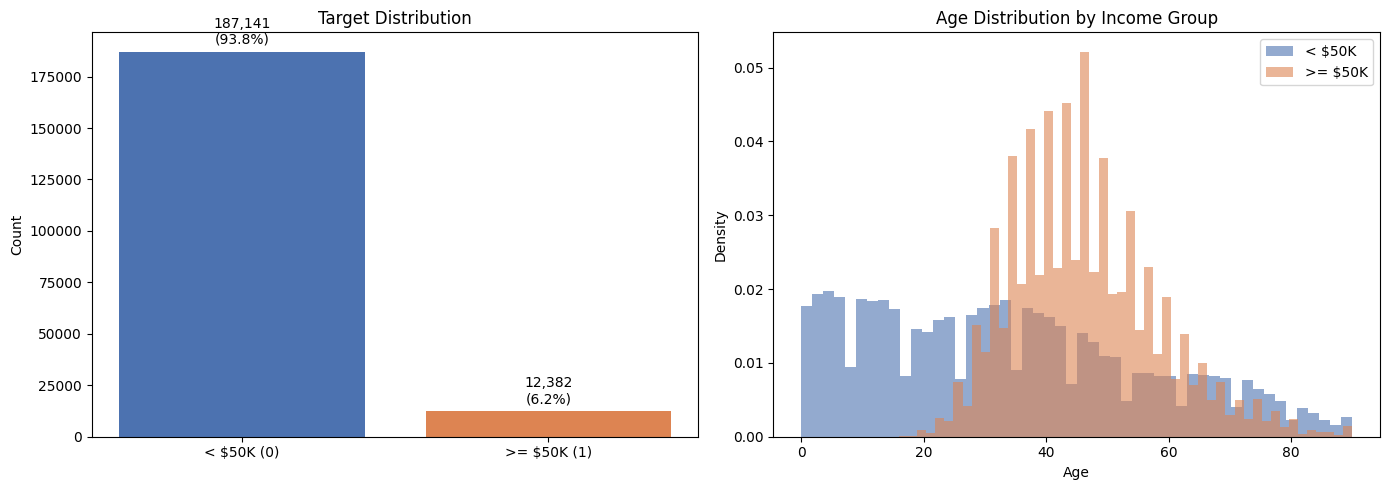

In [86]:
label_map = {0: "< $50K", 1: ">= $50K"}
colors = {0: "#4C72B0", 1: "#DD8452"}

# --- Target + age ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

tc = df["target"].value_counts().sort_index()
axes[0].bar([f"{label_map[i]} ({i})" for i in tc.index], tc.values, color=[colors[i] for i in tc.index])
axes[0].set_title("Target Distribution")
axes[0].set_ylabel("Count")
ymax = tc.max()
for i, (k, v) in enumerate(tc.items()):
    axes[0].text(i, v + 0.02 * ymax, f"{v:,}\n({v/len(df)*100:.1f}%)", ha="center")

for k in [0, 1]:
    axes[1].hist(df.loc[df["target"] == k, "age"], bins=50, alpha=0.6, density=True,
                 label=label_map[k], color=colors[k])
axes[1].set_title("Age Distribution by Income Group")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Density")
axes[1].legend()

plt.tight_layout()
plt.show()

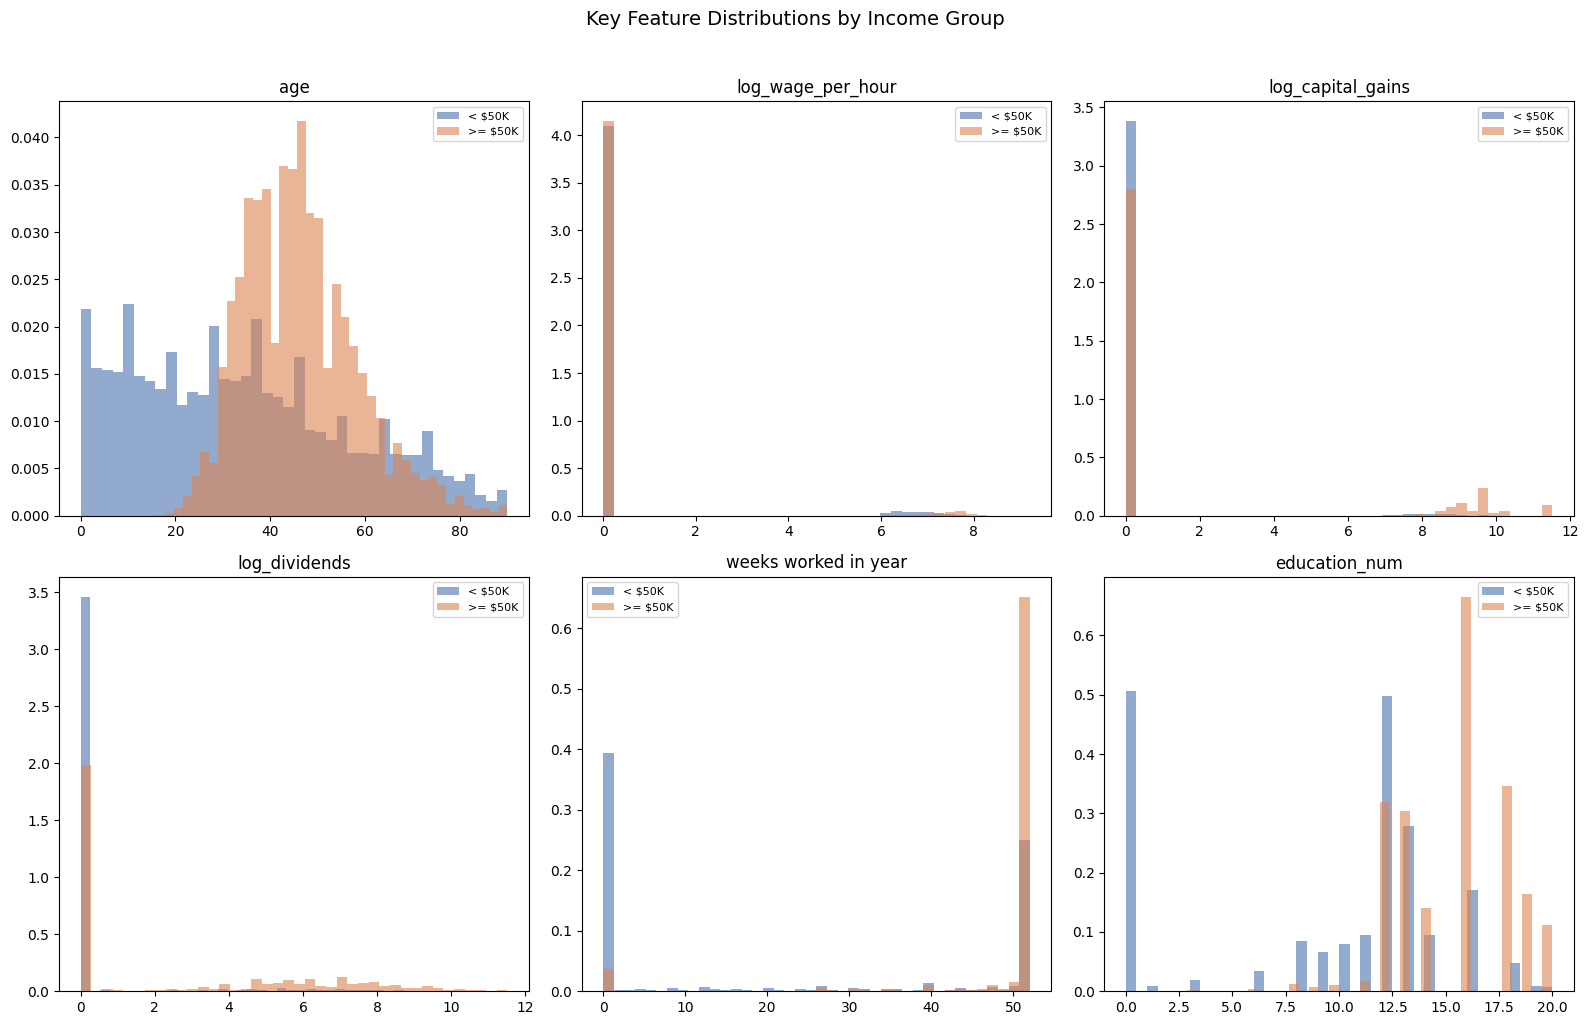

In [87]:
# --- Key numeric features ---
# plot_features = ["age", "wage per hour", "capital gains", "dividends from stocks",
#                  "weeks worked in year", "education_num"]

plot_features = [
    "age",
    "log_wage_per_hour",
    "log_capital_gains",
    "log_dividends",
    "weeks worked in year",
    "education_num"
]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
for ax, feat in zip(axes.flatten(), plot_features):
    for k in [0, 1]:
        ax.hist(df.loc[df["target"] == k, feat].dropna(), bins=40, alpha=0.6, density=True,
                label=label_map[k], color=colors[k])
    ax.set_title(feat)
    ax.legend(fontsize=8)

plt.suptitle("Key Feature Distributions by Income Group", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

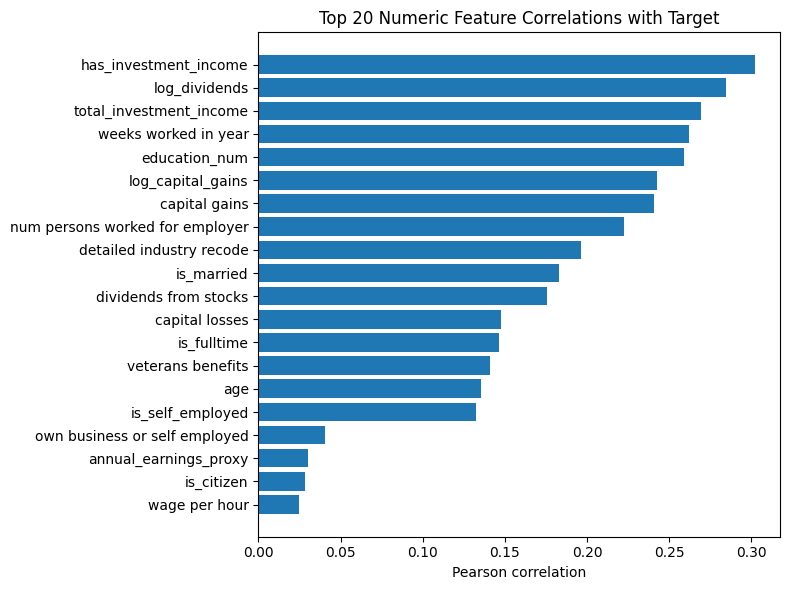

In [85]:
# Correlation with target (numeric only), excluding survey weight
num = df.select_dtypes("number").drop(columns=["weight"], errors="ignore")

corr_to_target = (
    num.corr(numeric_only=True)["target"]
      .drop("target")
      .sort_values(key=lambda s: s.abs(), ascending=False)
)

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(corr_to_target.index[:20][::-1], corr_to_target.values[:20][::-1])
ax.set_title("Top 20 Numeric Feature Correlations with Target")
ax.set_xlabel("Pearson correlation")
plt.tight_layout()
plt.show()

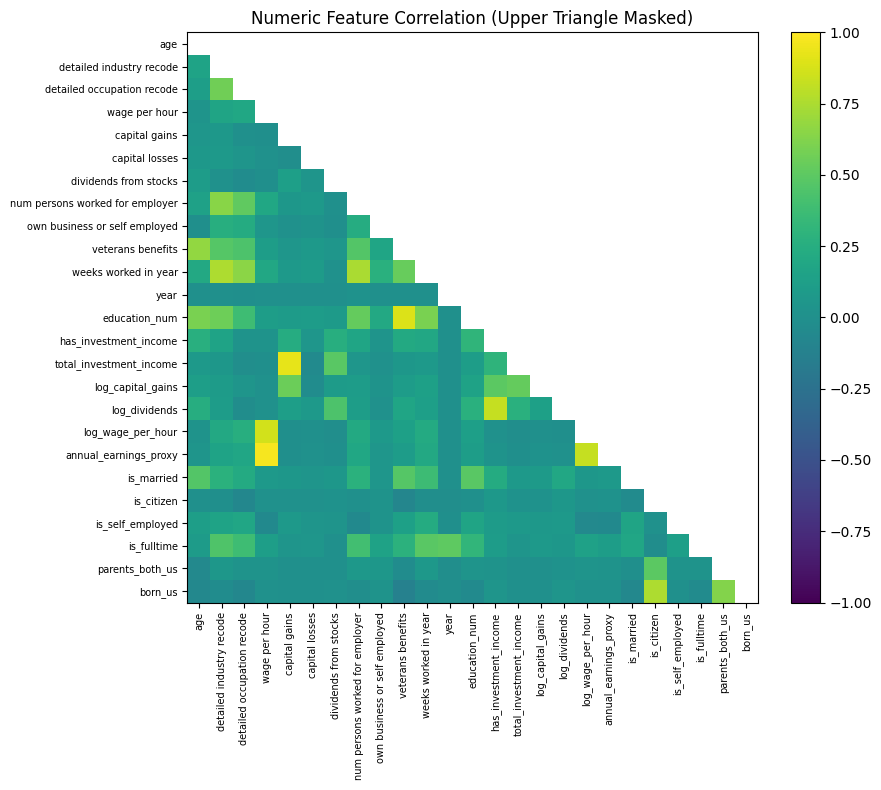

In [ ]:
num = df.select_dtypes("number").drop(columns=["weight", "target"], errors="ignore")
num = num.loc[:, num.nunique(dropna=False) > 1]  

corr = num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(np.ma.array(corr, mask=mask), vmin=-1, vmax=1)
ax.set_title("Numeric Feature Correlation (Upper Triangle Masked)")
ax.set_xticks(range(len(corr.columns))); ax.set_yticks(range(len(corr.index)))
ax.set_xticklabels(corr.columns, rotation=90, fontsize=7)
ax.set_yticklabels(corr.index, fontsize=7)
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

In [91]:
exclude_cols = ["label", "target", "weight"]
feature_cols = [c for c in df.columns if c not in exclude_cols]

numeric_features = df[feature_cols].select_dtypes(include="number").columns.tolist()
categorical_features = df[feature_cols].select_dtypes(include=["object", "category"]).columns.tolist()

print(f"Total features: {len(feature_cols)}")
print(f"Numeric features ({len(numeric_features)}): {numeric_features}")
print(f"\nCategorical features ({len(categorical_features)}): {categorical_features}")

Total features: 56
Numeric features (26): ['age', 'detailed industry recode', 'detailed occupation recode', 'wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', 'num persons worked for employer', 'own business or self employed', 'veterans benefits', 'weeks worked in year', 'year', 'education_num', 'education_num_missing', 'has_investment_income', 'total_investment_income', 'log_capital_gains', 'log_dividends', 'log_wage_per_hour', 'annual_earnings_proxy', 'is_married', 'is_citizen', 'is_self_employed', 'is_fulltime', 'parents_both_us', 'born_us']

Categorical features (30): ['class of worker', 'education', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member of a labor union', 'reason for unemployment', 'full or part time employment stat', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summ

In [94]:
X = df[feature_cols]
y = df["target"].astype(int)
w = df["weight"].astype(float)

X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, w, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print(f"\nTraining target distribution:\n{y_train.value_counts(normalize=True).round(4)*100}%")
print(f"\nTest target distribution:\n{y_test.value_counts(normalize=True).round(4)*100}%")

Training set: 159,618 samples
Test set: 39,905 samples

Training target distribution:
target
0    93.79
1     6.21
Name: proportion, dtype: float64%

Test target distribution:
target
0    93.8
1     6.2
Name: proportion, dtype: float64%


In [95]:
def evaluate(y_true, y_proba, threshold=0.5, name="model", sample_weight=None):
    y_proba = np.asarray(y_proba).ravel()
    y_pred = (y_proba >= threshold).astype(int)

    print(f"\n===== {name} =====")
    print("ROC-AUC:", roc_auc_score(y_true, y_proba, sample_weight=sample_weight))
    print("PR-AUC :", average_precision_score(y_true, y_proba, sample_weight=sample_weight))
    print("F1     :", f1_score(y_true, y_pred, sample_weight=sample_weight))
    print("Precision:", precision_score(y_true, y_pred, sample_weight=sample_weight, zero_division=0))
    print("Recall   :", recall_score(y_true, y_pred, sample_weight=sample_weight, zero_division=0))
    print("Confusion matrix:\n", confusion_matrix(y_true, y_pred, sample_weight=sample_weight))

In [96]:
# Preprocessing for Logistic Regression (scaling required for gradient-based models)
numeric_pipe_lr = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

cat_pipe_lr = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess_lr = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe_lr, numeric_features),
        ("cat", cat_pipe_lr, categorical_features),
    ]
)

# Logistic Regression — baseline linear model
lr = LogisticRegression(
    solver = "lbfgs",
    C = 0.03,
    max_iter = 2000,
    random_state = 42
)

lr_pipe = Pipeline(steps=[("prep", preprocess_lr), ("model", lr)])

lr_pipe.fit(X_train, y_train, model__sample_weight = w_train)

lr_proba = lr_pipe.predict_proba(X_test)[:, 1]
evaluate(y_test, lr_proba, name="Logistic Regression", sample_weight = w_test)


===== Logistic Regression =====
ROC-AUC: 0.9476929863758923
PR-AUC : 0.6301331765213422
F1     : 0.51915863873511
Precision: 0.7325742963797401
Recall   : 0.40203627201630854
Confusion matrix:
 [[64295092.42999995   658009.25      ]
 [ 2680958.75000001  1802521.81      ]]


In [97]:
from sklearn.ensemble import RandomForestClassifier

# Preprocessing for Random Forest (no scaling needed for tree-based models)
numeric_pipe_rf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
])

cat_pipe_rf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess_rf = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe_rf, numeric_features),
        ("cat", cat_pipe_rf, categorical_features),
    ]
)

rf_pipeline = Pipeline(steps=[
    ("prep", preprocess_rf),
    ("model", RandomForestClassifier(
        n_estimators=500,
        max_depth=20,
        min_samples_leaf=5,
        n_jobs=-1,
        random_state=42
    ))
])

rf_pipeline.fit(X_train, y_train, model__sample_weight=w_train)
rf_proba = rf_pipeline.predict_proba(X_test)[:, 1]
evaluate(y_test, rf_proba, name="Random Forest", sample_weight=w_test)


===== Random Forest =====
ROC-AUC: 0.949651041292643
PR-AUC : 0.6610128029126698
F1     : 0.47718774173666506
Precision: 0.8168390865363203
Recall   : 0.3370417847869501
Confusion matrix:
 [[64614261.16999993   338840.51      ]
 [ 2972360.27000001  1511120.29      ]]


In [98]:
numeric_pipe_xgb = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
])

cat_pipe_xgb = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess_xgb = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe_xgb, numeric_features),
        ("cat", cat_pipe_xgb, categorical_features),
    ]
)

xgb_pipe = Pipeline(steps=[
    ("prep", preprocess_xgb),
    ("model", XGBClassifier(
        n_estimators=600,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        objective="binary:logistic",
        eval_metric="aucpr",
        n_jobs=-1,
        random_state=42
    ))
])

xgb_pipe.fit(X_train, y_train, model__sample_weight=w_train)
xgb_proba = xgb_pipe.predict_proba(X_test)[:, 1]
evaluate(y_test, xgb_proba, name="XGBoost", sample_weight=w_test)


===== XGBoost =====
ROC-AUC: 0.9565205574782529
PR-AUC : 0.6989403175615293
F1     : 0.6005272644415268
Precision: 0.7587277855369645
Recall   : 0.49691640906768964
Confusion matrix:
 [[64244634.14999995   708467.53      ]
 [ 2255565.50000001  2227915.06      ]]


In [ ]:
base_xgb = XGBClassifier(
    objective = "binary:logistic",
    eval_metric = "aucpr",
    tree_method = "hist",
    n_jobs = -1,
    random_state = 42
)

xgb_pipe = Pipeline([("prep", preprocess), ("model", base_xgb)])

param_distributions = {
    "model__n_estimators": [300, 600, 900, 1200],
    "model__learning_rate": [0.01, 0.03, 0.05, 0.1],
    "model__max_depth": [3, 4, 5, 6, 8],
    "model__min_child_weight": [1, 3, 5, 10],
    "model__subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "model__colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "model__gamma": [0.0, 0.1, 0.3, 0.5, 1.0],
    "model__reg_lambda": [0.5, 1.0, 2.0, 5.0, 10.0],
    "model__reg_alpha": [0.0, 1e-4, 1e-3, 1e-2, 0.1],
}

ap_scorer = make_scorer(average_precision_score, needs_proba=True)

cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 42)

search = RandomizedSearchCV(
    xgb_pipe,
    param_distributions = param_distributions,
    n_iter = 40,
    scoring=ap_scorer,
    cv = cv,
    n_jobs = -1,
    verbose = 0,
    random_state = 42
)

search.fit(X_train, y_train, model__sample_weight = w_train)

print("Best CV PR-AUC:", search.best_score_)
print("Best params:", search.best_params_)

best_xgb = search.best_estimator_


oof_proba = np.zeros(len(X_train), dtype=float)

for tr_idx, va_idx in cv.split(X_train, y_train):
    m = clone(best_xgb)
    m.fit(X_train.iloc[tr_idx], y_train.iloc[tr_idx], model__sample_weight=w_train.iloc[tr_idx])
    oof_proba[va_idx] = m.predict_proba(X_train.iloc[va_idx])[:, 1]

thresholds = np.linspace(0.05, 0.95, 181)
f1s = [f1_score(y_train, (oof_proba >= t).astype(int), sample_weight=w_train) for t in thresholds]
best_t = float(thresholds[int(np.argmax(f1s))])
print("Best OOF threshold (weighted F1):", round(best_t, 3))

# -------------------------
# Fit best model on full train, evaluate on test (weighted)
# -------------------------
best_xgb.fit(X_train, y_train, model__sample_weight=w_train)
test_proba = best_xgb.predict_proba(X_test)[:, 1]

evaluate(y_test, test_proba, name="Tuned XGBoost (thr=0.5)", sample_weight=w_test)
evaluate(y_test, test_proba, threshold=best_t, name=f"Tuned XGBoost (thr={best_t:.2f})", sample_weight=w_test)

Best CV PR-AUC: nan
Best params: {'model__subsample': 0.9, 'model__reg_lambda': 1.0, 'model__reg_alpha': 0.01, 'model__n_estimators': 1200, 'model__min_child_weight': 10, 'model__max_depth': 3, 'model__learning_rate': 0.01, 'model__gamma': 0.5, 'model__colsample_bytree': 0.6}
Best OOF threshold (weighted F1): 0.33

===== Tuned XGBoost (thr=0.5) =====
ROC-AUC: 0.9527308002343641
PR-AUC : 0.6746300015330992
F1     : 0.5500277850177121
Precision: 0.7742890199428295
Recall   : 0.42649878914608064
Confusion matrix:
 [[64395681.50999992   557420.17      ]
 [ 2571281.53000001  1912199.03      ]]

===== Tuned XGBoost (thr=0.33) =====
ROC-AUC: 0.9527308002343641
PR-AUC : 0.6746300015330992
F1     : 0.6089666943873973
Precision: 0.6379924194046694
Recall   : 0.582467115682107
Confusion matrix:
 [[63471304.20999999  1481797.47      ]
 [ 1872000.57        2611479.99000001]]


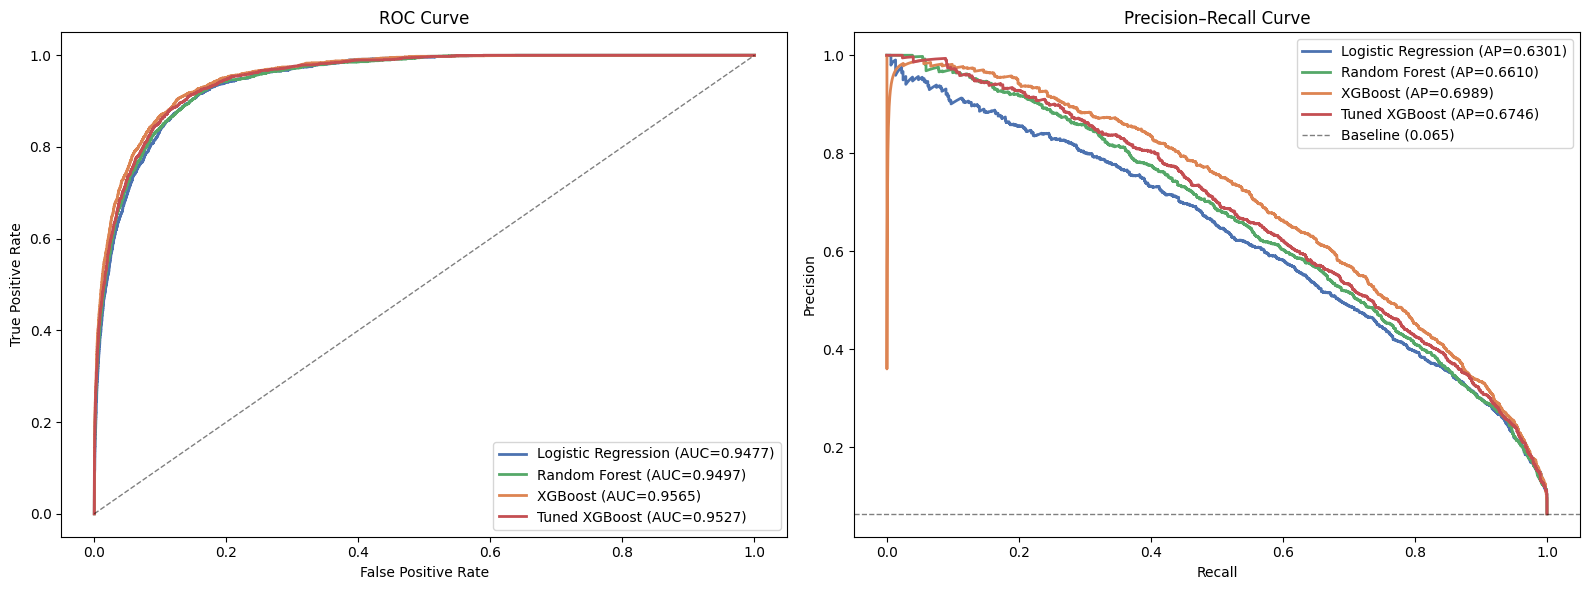

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

model_probas = {
    "Logistic Regression": lr_proba,
    "Random Forest": rf_proba,
    "XGBoost": xgb_proba,
    "Tuned XGBoost": test_proba,
}

colors = ["#4C72B0", "#55A868", "#DD8452", "#C44E52"]

# ROC
for (name, proba), c in zip(model_probas.items(), colors):
    fpr, tpr, _ = roc_curve(y_test, proba, sample_weight=w_test)
    axes[0].plot(fpr, tpr, lw=2, color=c,
                 label=f"{name} (AUC={roc_auc_score(y_test, proba, sample_weight=w_test):.4f})")

axes[0].plot([0, 1], [0, 1], "k--", lw=1, alpha=0.5)
axes[0].set_title("ROC Curve")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend(loc="lower right")

# PR
for (name, proba), c in zip(model_probas.items(), colors):
    p, r, _ = precision_recall_curve(y_test, proba, sample_weight=w_test)
    axes[1].plot(r, p, lw=2, color=c,
                 label=f"{name} (AP={average_precision_score(y_test, proba, sample_weight=w_test):.4f})")

baseline = np.average(y_test, weights=w_test)
axes[1].axhline(baseline, color="k", linestyle="--", lw=1, alpha=0.5,
                label=f"Baseline ({baseline:.3f})")
axes[1].set_title("Precision–Recall Curve")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].legend(loc="upper right")

plt.tight_layout()
plt.show()

In [106]:
def metrics_row(y_true, proba, thr, w):
    pred = (proba >= thr).astype(int)
    return {
        "threshold": thr,
        "ROC-AUC": roc_auc_score(y_true, proba, sample_weight=w),
        "PR-AUC": average_precision_score(y_true, proba, sample_weight=w),
        "Precision": precision_score(y_true, pred, sample_weight=w, zero_division=0),
        "Recall": recall_score(y_true, pred, sample_weight=w, zero_division=0),
        "F1": f1_score(y_true, pred, sample_weight=w, zero_division=0),
    }

# pick the final model's probabilities here (baseline or tuned)
final_name = "XGBoost"
final_proba = xgb_proba          # or test_proba if you choose tuned

rows = [
    metrics_row(y_test, final_proba, 0.50, w_test),
    metrics_row(y_test, final_proba, best_t, w_test),
]

threshold_table = pd.DataFrame(rows)
threshold_table = threshold_table.round(3)
threshold_table.insert(0, "model", final_name)
threshold_table

,model,threshold,ROC-AUC,PR-AUC,Precision,Recall,F1
0,XGBoost,0.50,0.957,0.699,0.759,0.497,0.601
1,XGBoost,0.33,0.957,0.699,0.639,0.629,0.634


In [107]:
# ===== Final Model Comparison (weighted, threshold=0.5) =====
models = {
    "Logistic Regression": lr_proba,
    "Random Forest": rf_proba,
    "XGBoost": xgb_proba,
    "Hyperparameter-tuned XGBoost": test_proba,  # only if you want to show it
}

def row(y_true, proba, w, thr=0.5):
    pred = (proba >= thr).astype(int)
    return {
        "Threshold": thr,
        "ROC-AUC": roc_auc_score(y_true, proba, sample_weight=w),
        "PR-AUC": average_precision_score(y_true, proba, sample_weight=w),
        "F1": f1_score(y_true, pred, sample_weight=w, zero_division=0),
        "Precision": precision_score(y_true, pred, sample_weight=w, zero_division=0),
        "Recall": recall_score(y_true, pred, sample_weight=w, zero_division=0),
    }

comparison_df = pd.DataFrame(
    [{"Model": name, **row(y_test, proba, w_test, thr=0.5)} for name, proba in models.items()]
).round(4)

display(comparison_df)

,Model,Threshold,ROC-AUC,PR-AUC,F1,Precision,Recall
0,Logistic Regression,0.5,0.9477,0.6301,0.5192,0.7326,0.4020
1,Random Forest,0.5,0.9497,0.6610,0.4772,0.8168,0.3370
2,XGBoost,0.5,0.9565,0.6989,0.6005,0.7587,0.4969
3,Hyperparameter-tuned XGBoost,0.5,0.9527,0.6746,0.5500,0.7743,0.4265



===== XGBoost (baseline) (thr=0.50) =====
ROC-AUC: 0.9565205574782529
PR-AUC : 0.6989403175615293
F1     : 0.6005272644415268
Precision: 0.7587277855369645
Recall   : 0.49691640906768964

Weighted confusion matrix (uses survey weights):
 [[64244634.14999995   708467.53      ]
 [ 2255565.50000001  2227915.06      ]]

Unweighted confusion matrix (raw counts):
 [[37025   404]
 [ 1249  1227]]


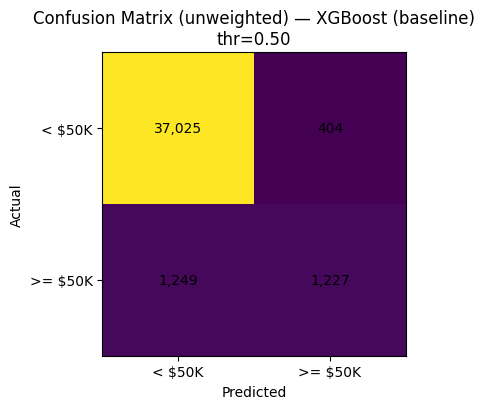

In [108]:
# ===== Final evaluation: Best model (Baseline XGBoost) =====
# Assumes you already have: y_test, w_test, xgb_proba
# Optional: set BEST_T = best_t if you picked a threshold; otherwise keep 0.50

BEST_NAME = "XGBoost (baseline)"
BEST_PROBA = xgb_proba
BEST_T = 0.50          # change to best_t if you want your chosen operating point

# ---- Metrics ----
pred = (BEST_PROBA >= BEST_T).astype(int)

print(f"\n===== {BEST_NAME} (thr={BEST_T:.2f}) =====")
print("ROC-AUC:", roc_auc_score(y_test, BEST_PROBA, sample_weight=w_test))
print("PR-AUC :", average_precision_score(y_test, BEST_PROBA, sample_weight=w_test))
print("F1     :", f1_score(y_test, pred, sample_weight=w_test, zero_division=0))
print("Precision:", precision_score(y_test, pred, sample_weight=w_test, zero_division=0))
print("Recall   :", recall_score(y_test, pred, sample_weight=w_test, zero_division=0))

cm_w = confusion_matrix(y_test, pred, sample_weight=w_test)
cm_u = confusion_matrix(y_test, pred)

print("\nWeighted confusion matrix (uses survey weights):\n", cm_w)
print("\nUnweighted confusion matrix (raw counts):\n", cm_u)

# ---- Plot (unweighted counts for readability) ----
fig, ax = plt.subplots(figsize=(4.8, 4.2))
im = ax.imshow(cm_u)

for (i, j), v in np.ndenumerate(cm_u):
    ax.text(j, i, f"{v:,}", ha="center", va="center")

ax.set_xticks([0, 1]); ax.set_yticks([0, 1])
ax.set_xticklabels(["< $50K", ">= $50K"])
ax.set_yticklabels(["< $50K", ">= $50K"])
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title(f"Confusion Matrix (unweighted) — {BEST_NAME}\nthr={BEST_T:.2f}")

plt.tight_layout()
plt.show()

In [132]:
numeric_pipe_clust = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe_clust = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# drop the problematic column for clustering only
categorical_features_clust = [c for c in categorical_features
                             if c != "full or part time employment stat"]

preprocess_clust = ColumnTransformer([
    ("num", numeric_pipe_clust, numeric_features),
    ("cat", cat_pipe_clust, categorical_features_clust),
])

feature_cols_clust = [c for c in feature_cols if c != "full or part time employment stat"]
X_encoded = preprocess_clust.fit_transform(df[feature_cols_clust])

Clustering input: (199523, 50) | variance captured: 0.937


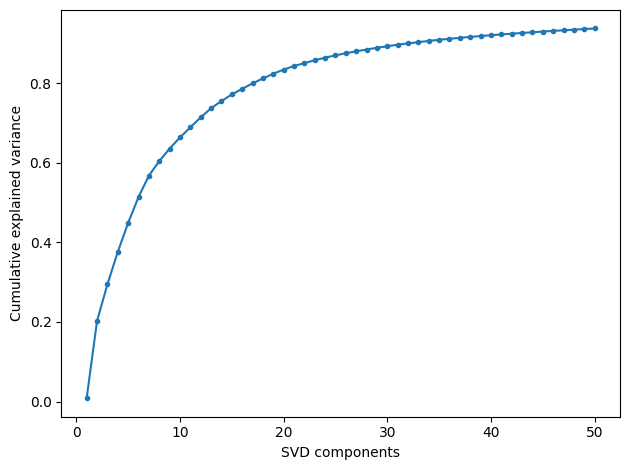

In [133]:
from sklearn.decomposition import TruncatedSVD

n_components_clust = 50  # simple, standard for sparse one-hot
svd = TruncatedSVD(n_components=n_components_clust, random_state=42)

X_clust_ready = svd.fit_transform(X_encoded)
print("Clustering input:", X_clust_ready.shape,
      "| variance captured:", svd.explained_variance_ratio_.sum().round(3))

cumvar = np.cumsum(svd.explained_variance_ratio_)
plt.plot(np.arange(1, len(cumvar)+1), cumvar, marker="o", markersize=3)
plt.xlabel("SVD components")
plt.ylabel("Cumulative explained variance")
plt.tight_layout()
plt.show()

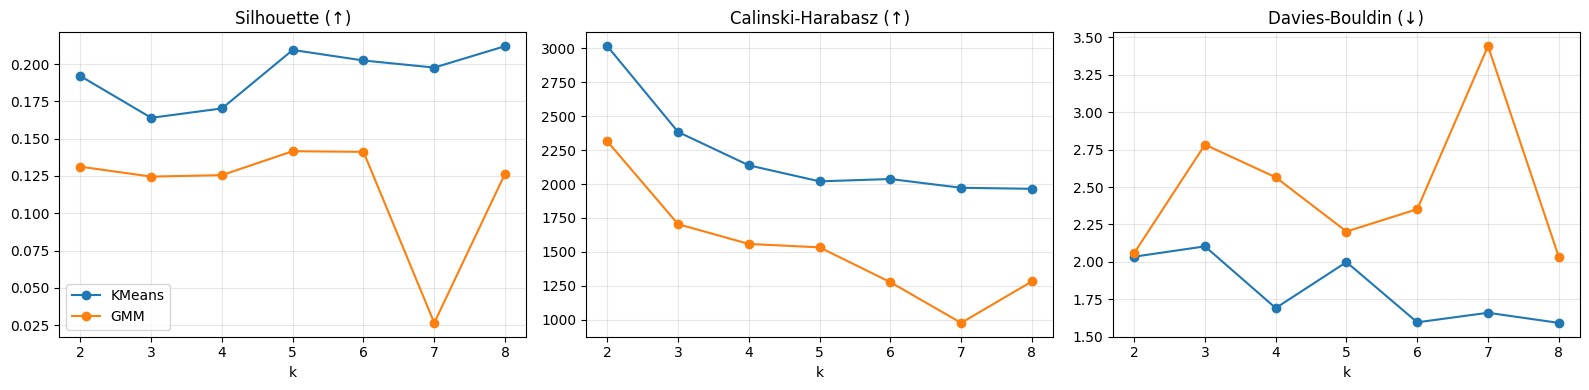

In [134]:
np.random.seed(42)
sub_size = min(15000, X_clust_ready.shape[0])
idx = np.random.choice(X_clust_ready.shape[0], sub_size, replace=False)
X_sub = X_clust_ready[idx]   # no extra scaling

algorithms = {
    "KMeans": lambda k: KMeans(n_clusters=k, n_init=10, random_state=42),
    "GMM":    lambda k: GaussianMixture(n_components=k, covariance_type="diag", random_state=42),
}

k_range = range(2, 9)
results = {name: {"sil": [], "ch": [], "db": []} for name in algorithms}

for k in k_range:
    for name, make in algorithms.items():
        m = make(k)
        labels = m.fit_predict(X_sub) if name == "KMeans" else m.fit(X_sub).predict(X_sub)
        results[name]["sil"].append(silhouette_score(X_sub, labels, sample_size=min(5000, sub_size), random_state=42))
        results[name]["ch"].append(calinski_harabasz_score(X_sub, labels))
        results[name]["db"].append(davies_bouldin_score(X_sub, labels))

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for name in algorithms:
    axes[0].plot(list(k_range), results[name]["sil"], "o-", label=name)
    axes[1].plot(list(k_range), results[name]["ch"],  "o-", label=name)
    axes[2].plot(list(k_range), results[name]["db"],  "o-", label=name)
axes[0].set_title("Silhouette (↑)"); axes[1].set_title("Calinski-Harabasz (↑)"); axes[2].set_title("Davies-Bouldin (↓)")
for ax in axes: ax.set_xlabel("k"); ax.grid(alpha=0.3)
axes[0].legend()
plt.tight_layout()
plt.show()

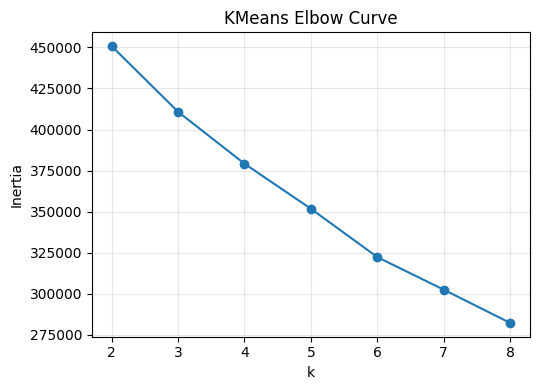

In [135]:
from sklearn.cluster import KMeans

inertias = []
k_range = range(2, 9)

for k in k_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X_sub)
    inertias.append(km.inertia_)

plt.figure(figsize=(5.5, 4))
plt.plot(list(k_range), inertias, "o-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("KMeans Elbow Curve")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [136]:
# 1) Fit final KMeans on full reduced matrix
k = 6
kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
cluster_labels = kmeans.fit_predict(X_clust_ready)

# 2) Attach to dataframe
df_seg = df.copy()
df_seg["cluster"] = cluster_labels

# 3) Basic cluster sizes (unweighted + weighted)
cluster_sizes = df_seg["cluster"].value_counts().sort_index()
cluster_weights = df_seg.groupby("cluster")["weight"].sum().sort_index()

summary = pd.DataFrame({
    "n": cluster_sizes,
    "weight_sum": cluster_weights,
    "weight_share": (cluster_weights / cluster_weights.sum()),
    "target_rate_unweighted": df_seg.groupby("cluster")["target"].mean().sort_index(),
    "target_rate_weighted": (
        df_seg.groupby("cluster")
              .apply(lambda g: np.average(g["target"], weights=g["weight"]))
              .sort_index()
    ),
}).reset_index().rename(columns={"index": "cluster"})

summary.round(4)

,cluster,n,weight_sum,weight_share,target_rate_unweighted,target_rate_weighted
0,0,45659,79239025.06,0.2282,0.0111,0.0115
1,1,10957,19766594.75,0.0569,0.0483,0.0481
2,2,42390,74747145.58,0.2153,0.0982,0.1005
3,3,6832,11914273.01,0.0343,0.3732,0.3769
4,4,52134,87299881.45,0.2514,0.0000,0.0000
5,5,41551,74278972.62,0.2139,0.1115,0.1129


In [137]:
def topk_table(df_seg, col, k=3):
    # returns a tidy table: rows=cluster, cols=ranked top categories
    rows = []
    for cl, g in df_seg.groupby("cluster"):
        s = g.groupby(col)["weight"].sum().sort_values(ascending=False)
        total = s.sum()
        top = (s.head(k) / total).round(3)
        rows.append({
            "cluster": cl,
            **{f"top{i+1}": f"{idx} ({val:.3f})" for i, (idx, val) in enumerate(top.items())}
        })
    return pd.DataFrame(rows).sort_values("cluster").reset_index(drop=True)

# Example: show only the most important 2–3 fields
display(topk_table(df_seg, "full or part time employment stat", k=3))
display(topk_table(df_seg, "class of worker", k=3))
display(topk_table(df_seg, "education", k=3))

,cluster,top1,top2,top3
0,0,Not in labor force (0.503),Children or Armed Forces (0.490),Unemployed full-time (0.005)
1,1,Children or Armed Forces (0.503),Full-time schedules (0.434),PT for non-econ reasons usually FT (0.040)
2,2,Children or Armed Forces (1.000),NaN,NaN
3,3,Children or Armed Forces (0.481),Full-time schedules (0.356),Not in labor force (0.108)
4,4,Children or Armed Forces (0.952),Not in labor force (0.046),Unemployed part- time (0.002)
5,5,Full-time schedules (0.805),PT for non-econ reasons usually FT (0.065),Unemployed full-time (0.050)


,cluster,top1,top2,top3
0,0,Not applicable (0.988),Never worked (0.006),Private (0.005)
1,1,Private (0.864),Local government (0.070),Federal government (0.034)
2,2,Private (0.703),Self-employed-not incorporated (0.091),Local government (0.078)
3,3,Private (0.520),Not applicable (0.208),Self-employed-not incorporated (0.081)
4,4,Not applicable (0.996),Never worked (0.004),Private (0.000)
5,5,Private (0.714),Self-employed-not incorporated (0.091),Local government (0.078)


,cluster,top1,top2,top3
0,0,High school graduate (0.336),Some college but no degree (0.157),7th and 8th grade (0.093)
1,1,High school graduate (0.395),Some college but no degree (0.241),Bachelors degree(BA AB BS) (0.100)
2,2,High school graduate (0.327),Some college but no degree (0.209),Bachelors degree(BA AB BS) (0.164)
3,3,High school graduate (0.256),Bachelors degree(BA AB BS) (0.243),Some college but no degree (0.177)
4,4,Children (0.906),9th grade (0.033),7th and 8th grade (0.025)
5,5,High school graduate (0.319),Some college but no degree (0.207),Bachelors degree(BA AB BS) (0.170)


,cluster,n,weight_share,target_rate_w,age_mean,edu_mean,weeks_mean
0,0,45659.0,0.2282,0.0115,54.7008,11.4016,2.2663
1,1,10957.0,0.0569,0.0481,36.4092,12.5527,45.6536
2,2,42390.0,0.2153,0.1005,37.9013,13.1092,44.0536
3,3,6832.0,0.0343,0.3769,48.4393,14.2443,40.2639
4,4,52134.0,0.2514,0.0000,7.7308,0.8606,0.1410
5,5,41551.0,0.2139,0.1129,38.1224,13.1573,44.7235


,cluster,education,class of worker,marital stat,major occupation code
0,0,High school graduate,Not applicable,Married-civilian spouse present,Not applicable
1,1,High school graduate,Private,Married-civilian spouse present,Adm support including clerical
2,2,High school graduate,Private,Married-civilian spouse present,Adm support including clerical
3,3,High school graduate,Private,Married-civilian spouse present,Not applicable
4,4,Children,Not applicable,Never married,Not applicable
5,5,High school graduate,Private,Married-civilian spouse present,Adm support including clerical


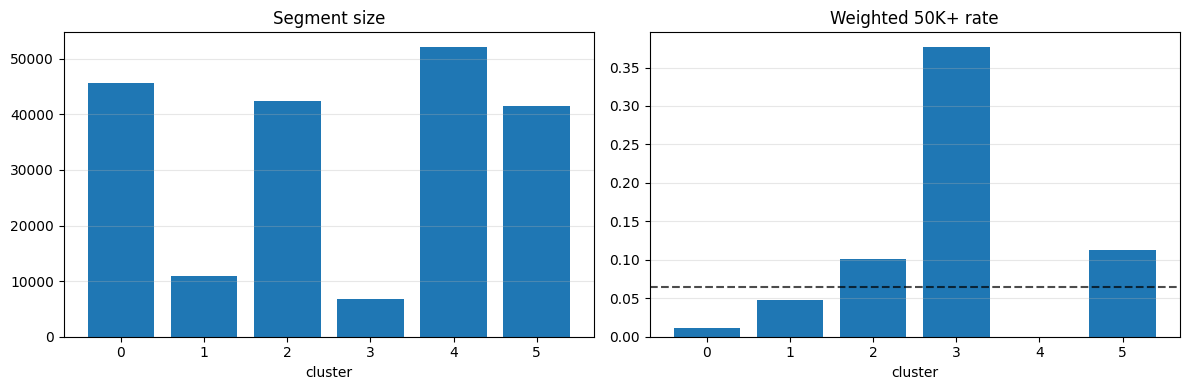

In [138]:
# summary table (weighted)
summary = df_seg.groupby("cluster").apply(lambda g: pd.Series({
    "n": len(g),
    "weight_share": g["weight"].sum() / df_seg["weight"].sum(),
    "target_rate_w": np.average(g["target"], weights=g["weight"]),
    "age_mean": np.average(g["age"], weights=g["weight"]),
    "edu_mean": np.average(g["education_num"].fillna(0), weights=g["weight"]),
    "weeks_mean": np.average(g["weeks worked in year"], weights=g["weight"]),
})).reset_index().round(4)

display(summary)

# top categories (weighted) for a few key fields
def top1_weighted(g, col):
    s = g.groupby(col)["weight"].sum().sort_values(ascending=False)
    return s.index[0]

cats = ["education", "class of worker", "marital stat", "major occupation code"]
cat_modes = df_seg.groupby("cluster").apply(lambda g: pd.Series({c: top1_weighted(g, c) for c in cats})).reset_index()
display(cat_modes)

# plot: segment size + target rate
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].bar(summary["cluster"], summary["n"])
ax[0].set_title("Segment size"); ax[0].set_xlabel("cluster"); ax[0].grid(axis="y", alpha=0.3)

ax[1].bar(summary["cluster"], summary["target_rate_w"])
ax[1].axhline(np.average(df_seg["target"], weights=df_seg["weight"]), linestyle="--", color="black", alpha=0.7)
ax[1].set_title("Weighted 50K+ rate"); ax[1].set_xlabel("cluster"); ax[1].grid(axis="y", alpha=0.3)

plt.tight_layout(); plt.show()

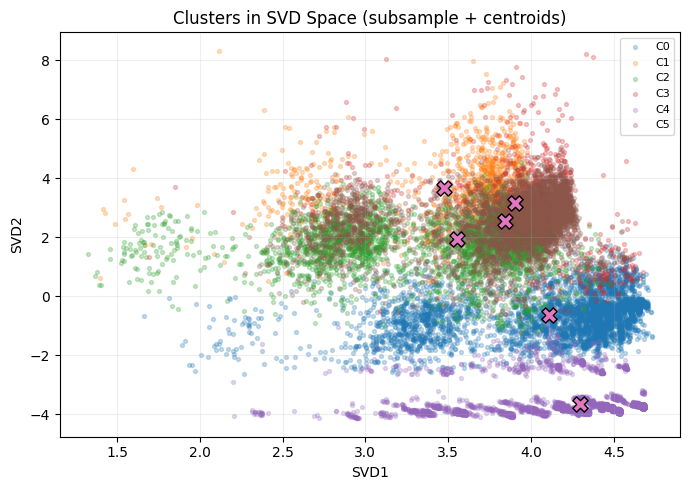

In [139]:
# Subsample for clean scatter
np.random.seed(42)
idx = np.random.choice(len(df_seg), size=min(20000, len(df_seg)), replace=False)
xy = X_clust_ready[idx, :2]
lab = df_seg.loc[idx, "cluster"].values

fig, ax = plt.subplots(figsize=(7, 5))
for c in np.unique(lab):
    m = lab == c
    ax.scatter(xy[m, 0], xy[m, 1], s=8, alpha=0.25, label=f"C{c}")

# add centroids (computed in full space then projected is overkill; just do centroid in 2D view)
cent = pd.DataFrame(xy, columns=["SVD1","SVD2"]).assign(cluster=lab).groupby("cluster")[["SVD1","SVD2"]].mean()
ax.scatter(cent["SVD1"], cent["SVD2"], s=120, marker="X", edgecolor="black")

ax.set_title("Clusters in SVD Space (subsample + centroids)")
ax.set_xlabel("SVD1"); ax.set_ylabel("SVD2")
ax.legend(fontsize=8); ax.grid(alpha=0.2)
plt.tight_layout(); plt.show()

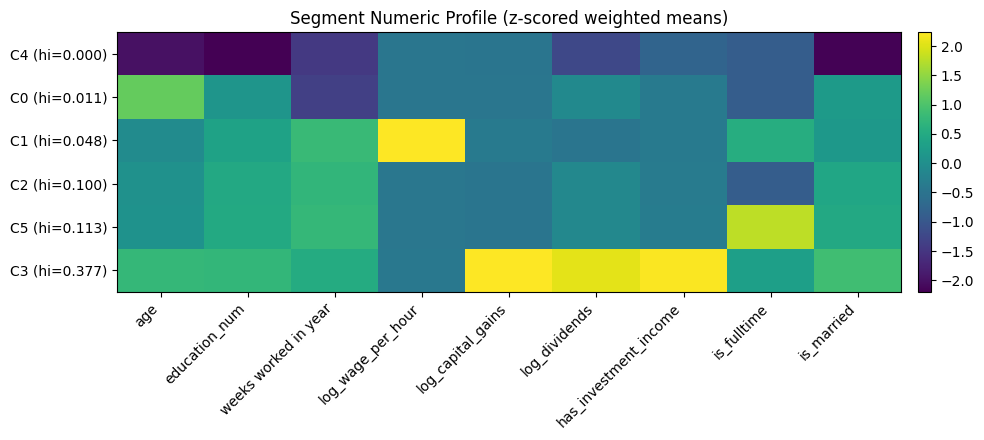

In [140]:
# order clusters by weighted high-income rate
hi = df_seg.groupby("cluster").apply(lambda g: np.average(g["target"], weights=g["weight"]))
order = hi.sort_values().index.tolist()

M = df_seg.groupby("cluster").apply(
    lambda g: pd.Series({c: np.average(g[c].fillna(0), weights=g["weight"]) for c in num_cols})
).loc[order]

Z = (M - M.mean()) / M.std(ddof=0)

row_labels = [f"C{c} (hi={hi[c]:.3f})" for c in order]

fig, ax = plt.subplots(figsize=(10, 4.5))
im = ax.imshow(Z.values, aspect="auto")
ax.set_yticks(range(len(row_labels))); ax.set_yticklabels(row_labels)
ax.set_xticks(range(len(num_cols))); ax.set_xticklabels(num_cols, rotation=45, ha="right")
ax.set_title("Segment Numeric Profile (z-scored weighted means)")
plt.colorbar(im, ax=ax, fraction=0.03, pad=0.02)
plt.tight_layout(); plt.show()

In [141]:
# Must-do check: validate Cluster 3 vs Cluster 2 using numeric signals (weighted)
check_cols = ["age", "education_num", "weeks worked in year",
              "log_wage_per_hour", "has_investment_income", "is_fulltime"]

clusters_to_check = [2, 3]

cmp = (df_seg[df_seg["cluster"].isin(clusters_to_check)]
       .groupby("cluster")
       .apply(lambda g: pd.Series({
           "n": len(g),
           "target_rate_w": np.average(g["target"], weights=g["weight"]),
           **{c: np.average(g[c].fillna(0), weights=g["weight"]) for c in check_cols}
       }))
       .reset_index()
       .round(4))

cmp

,cluster,n,target_rate_w,age,education_num,weeks worked in year,log_wage_per_hour,has_investment_income,is_fulltime
0,2,42390.0,0.1005,37.9013,13.1092,44.0536,0.0182,0.1425,0.0000
1,3,6832.0,0.3769,48.4393,14.2443,40.2639,0.0642,1.0000,0.3557


In [148]:
persona = {
    0: "Older Non-Workers",
    1: "Low-Income Workers",
    2: "Steady Workers",
    3: "Affluent Investors",
    4: "Dependents",
    5: "Prime Full-Time Workers",
}
df_seg["persona"] = df_seg["cluster"].map(persona)

In [149]:
def wavg(g, col):
    x = g[col]
    w = g["weight"]
    m = x.notna()
    return np.average(x[m], weights=w[m])

seg = (df_seg.groupby(["cluster","persona"])
       .apply(lambda g: pd.Series({
           "n": len(g),
           "weight_share": g["weight"].sum() / df_seg["weight"].sum(),
           "hi_rate_w": wavg(g, "target"),                     # target has no NaNs
           "age": wavg(g, "age"),
           "edu": wavg(g, "education_num"),
           "weeks": wavg(g, "weeks worked in year"),
           "inv_flag": wavg(g, "has_investment_income"),       # already 0/1
       }))
       .reset_index()
       .sort_values("hi_rate_w", ascending=False))

seg[["cluster","persona","n","weight_share","hi_rate_w","age","edu","weeks","inv_flag"]].round(3)

,cluster,persona,n,weight_share,hi_rate_w,age,edu,weeks,inv_flag
3,3,Affluent Investors,6832.0,0.034,0.377,48.439,14.244,40.264,1.000
5,5,Prime Full-Time Workers,41551.0,0.214,0.113,38.122,13.157,44.723,0.145
2,2,Steady Workers,42390.0,0.215,0.100,37.901,13.109,44.054,0.143
1,1,Low-Income Workers,10957.0,0.057,0.048,36.409,12.553,45.654,0.131
0,0,Older Non-Workers,45659.0,0.228,0.011,54.701,11.402,2.266,0.131
4,4,Dependents,52134.0,0.251,0.000,7.731,0.861,0.141,0.000


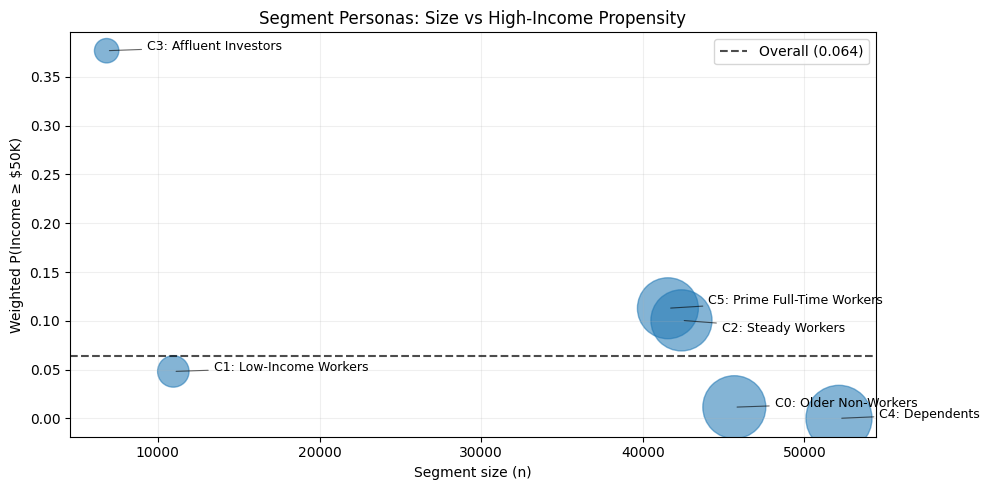

In [152]:
seg_plot = seg.sort_values("hi_rate_w", ascending=False).copy()
overall = np.average(df_seg["target"], weights=df_seg["weight"])

fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(
    seg_plot["n"], seg_plot["hi_rate_w"],
    s=9000 * seg_plot["weight_share"],
    alpha=0.55
)

ax.axhline(overall, ls="--", c="black", alpha=0.7, label=f"Overall ({overall:.3f})")

# hand-tuned offsets (only for the few overlapping ones)
offsets = {
    2: (2500, -0.008),  # C2 down-right
    5: (2500,  0.008),  # C5 up-right
    0: (2500,  0.004),
    4: (2500,  0.004),
    1: (2500,  0.004),
    3: (2500,  0.004),
}

for _, r in seg_plot.iterrows():
    c = int(r["cluster"])
    dx, dy = offsets.get(c, (2000, 0.004))
    ax.annotate(
        f"C{c}: {r['persona']}",
        xy=(r["n"], r["hi_rate_w"]),
        xytext=(r["n"] + dx, r["hi_rate_w"] + dy),
        textcoords="data",
        fontsize=9,
        ha="left", va="center",
        arrowprops=dict(arrowstyle="-", lw=0.8, alpha=0.6)
    )

ax.set_xlabel("Segment size (n)")
ax.set_ylabel("Weighted P(Income ≥ $50K)")
ax.set_title("Segment Personas: Size vs High-Income Propensity")
ax.grid(alpha=0.2)
ax.legend()
plt.tight_layout()
plt.show()

In [153]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
import numpy as np

np.random.seed(42)
sub_idx = np.random.choice(len(X_clust_ready), size=20000, replace=False)
X_sub = X_clust_ready[sub_idx]

Ks = 6  # your chosen k
seeds = [0, 7, 21, 42, 99]

labels = []
for s in seeds:
    km = KMeans(n_clusters=Ks, n_init=20, random_state=s)
    labels.append(km.fit_predict(X_sub))

# pairwise ARI
aris = []
for i in range(len(seeds)):
    for j in range(i+1, len(seeds)):
        aris.append(adjusted_rand_score(labels[i], labels[j]))

print(f"Stability (ARI) across seeds: mean={np.mean(aris):.3f}, min={np.min(aris):.3f}")

Stability (ARI) across seeds: mean=0.936, min=0.839
